# Economic Indicators in Toronto 

In [105]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

from shapely.geometry import Point

%matplotlib inline
import qeds
qeds.themes.mpl_style();
import warnings
warnings.filterwarnings('ignore')

In [106]:
hoods = gpd.read_file('/Users/janhavi/Desktop/case_comp/new data/Neighbourhoods/Neighbourhoods.shp')
neighborhoods = hoods.drop(columns = ['FIELD_1', 'FIELD_2', 'FIELD_3', 'FIELD_4', 
                                     'FIELD_5', 'FIELD_7'])
neighborhoods.head()

,FIELD_6,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,FIELD_17,FIELD_18,geometry
0,96,Casa Loma (96),None,None,None,None,17545105,3.678385e+06,8214.176485,None,None,"POLYGON ((-79.41469 43.67391, -79.41485 43.674..."
1,95,Annex (95),None,None,None,None,17545121,5.337192e+06,10513.883143,None,None,"POLYGON ((-79.39414 43.66872, -79.39588 43.668..."
2,109,Caledonia-Fairbank (109),None,None,None,None,17545137,2.955857e+06,6849.911724,None,None,"POLYGON ((-79.46021 43.68156, -79.46044 43.681..."
3,64,Woodbine Corridor (64),None,None,None,None,17545153,3.052518e+06,7512.966773,None,None,"POLYGON ((-79.31485 43.66674, -79.31660 43.666..."
4,103,Lawrence Park South (103),None,None,None,None,17545169,6.211341e+06,13530.370002,None,None,"POLYGON ((-79.41096 43.70408, -79.41165 43.703..."


In [107]:
eco_data = pd.read_excel('/Users/janhavi/Desktop/case_comp/new data/economic_data.xlsx')
eco_data.head()

,Neighbourhood,Neighbourhood Id,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients
0,West Humber-Clairville,1,2463,195,719,317508,58271,2912
1,Mount Olive-Silverstone-Jamestown,2,271,60,687,251119,3244,6561
2,Thistletown-Beaumond Heights,3,217,25,718,414216,1311,1276
3,Rexdale-Kipling,4,144,75,721,392271,1178,1323
4,Elms-Old Rexdale,5,67,60,692,233832,903,1683


In [108]:
pop_data = pd.read_excel('/Users/janhavi/Desktop/case_comp/new data/popultion.xlsx')
pop_data.head()

,HoodID,Neighbourhood,Population
0,1,West Humber-Clairville,33312
1,2,Mount Olive-Silverstone-Jamestown,32954
2,3,Thistletown-Beaumond Heights,10360
3,4,Rexdale-Kipling,10529
4,5,Elms-Old Rexdale,9456


In [109]:
house_price = pd.read_excel('/Users/janhavi/Desktop/case_comp/new data/housing.xlsx')
house_price = house_price.drop(columns = ['Mid-Century Highrise Households', 'Mid-Century Highrise Population',
                                         'Percent Mid-Century Highrise Households',
                                        'Percent Mid-Century Highrise Population',
                                         'Rent Bank Applicants', 'Social Housing Turnover', 
                                         'Social Housing Units', 'Social Housing Waiting List'])
house_price.head()

,Neighbourhood,Neighbourhood Id,Home Prices
0,West Humber-Clairville,1,317508
1,Mount Olive-Silverstone-Jamestown,2,251119
2,Thistletown-Beaumond Heights,3,414216
3,Rexdale-Kipling,4,392271
4,Elms-Old Rexdale,5,233832


In [110]:
data_1 = pd.merge(neighborhoods, eco_data, left_on="FIELD_6", right_on="Neighbourhood Id")
data_2 = data_1.drop(columns = ["FIELD_6", 'FIELD_8', 'FIELD_9', 'FIELD_10', 'FIELD_11', 'FIELD_12', 
                               'Child Care Spaces', 'Debt Risk Score', 'Home Prices', 
                               'Social Assistance Recipients'])
data_3 = pd.merge(data_2, pop_data, left_on='Neighbourhood Id', right_on='HoodID')
data_3 = data_3.drop(columns = 'Neighbourhood_x')
data_3 = data_3.rename(columns = {'Neighbourhood_y':'Neighbourhood'})
data_3.head()

,FIELD_13,FIELD_14,FIELD_15,FIELD_17,FIELD_18,geometry,Neighbourhood Id,Businesses,Local Employment,HoodID,Neighbourhood,Population
0,17545105,3.678385e+06,8214.176485,None,None,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",96,258,3283,96,Casa Loma,10968
1,17545121,5.337192e+06,10513.883143,None,None,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",95,2328,25719,95,Annex,30526
2,17545137,2.955857e+06,6849.911724,None,None,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",109,92,944,109,Caledonia-Fairbank,9955
3,17545153,3.052518e+06,7512.966773,None,None,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",64,146,1896,64,Woodbine Corridor,12541
4,17545169,6.211341e+06,13530.370002,None,None,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",103,167,1634,103,Lawrence Park South,15179


In [111]:
data = pd.merge(data_3, house_price, left_on='HoodID', right_on='Neighbourhood Id')
data = data.drop(columns = ['Neighbourhood Id_x', 'Neighbourhood_y', 'FIELD_13', 'FIELD_14', 'FIELD_15', 
                           'FIELD_17', 'FIELD_18', 'Neighbourhood Id_y'])
data = data.rename(columns = {'Neighbourhood_x':'Neighbourhood'})
data.head()

,geometry,Businesses,Local Employment,HoodID,Neighbourhood,Population,Home Prices
0,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",258,3283,96,Casa Loma,10968,1083381
1,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",2328,25719,95,Annex,30526,993491
2,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",92,944,109,Caledonia-Fairbank,9955,400532
3,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",146,1896,64,Woodbine Corridor,12541,521549
4,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",167,1634,103,Lawrence Park South,15179,1215390


# Employment Trends

In [112]:
data_emp = [[2015, 1422280],
       [2016, 1440790],
       [2017, 1496250],
       [2019, 1522880],
       [2020, 1449910]]
df = pd.DataFrame(data_emp, columns = ['Year', 'Employment'])
df

,Year,Employment
0,2015,1422280
1,2016,1440790
2,2017,1496250
3,2019,1522880
4,2020,1449910


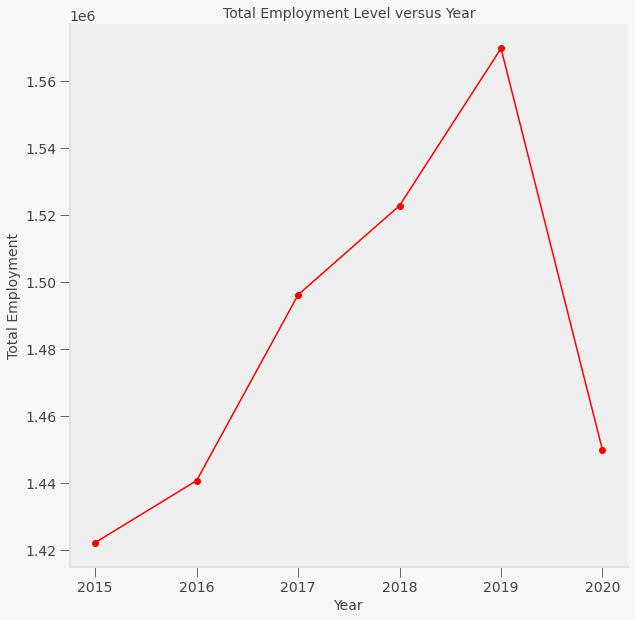

In [126]:
Year = [2015, 2016, 2017, 2018, 2019 ,2020]
Employment = [1422280, 1440790, 1496250, 1522880, 1569800, 1449910]
plt.figure(figsize=(10,10))
plt.plot(Year, Employment, color='red', marker='o')
plt.title('Total Employment Level versus Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Employment', fontsize=14)
plt.grid(False)
plt.show()

# Mapping

Mapping various trends in the economic field in Toronto. 


## Number of Businesses

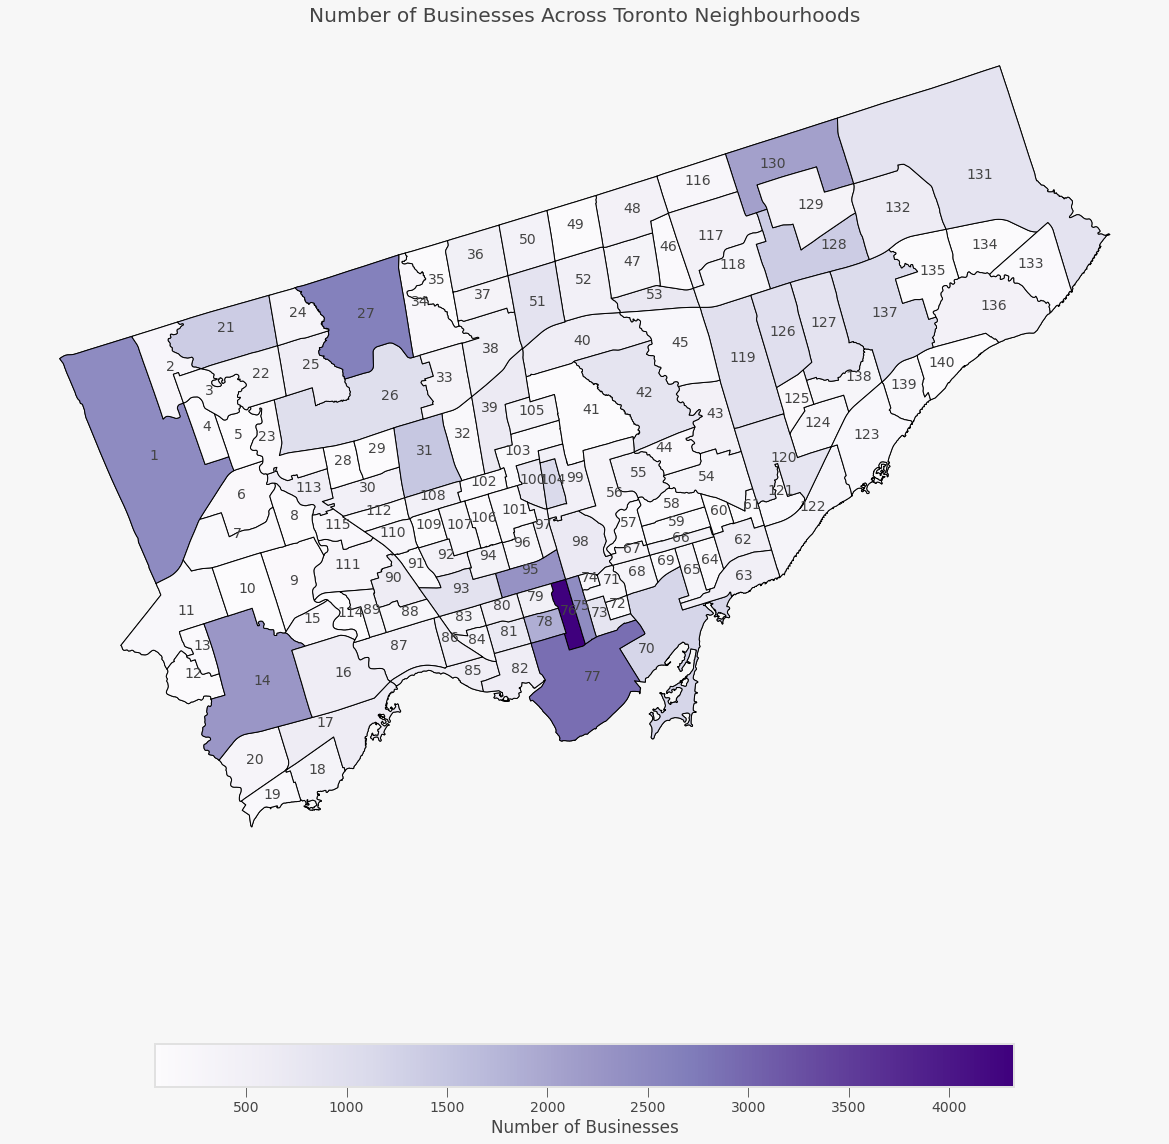

In [132]:
fig, gax = plt.subplots(figsize=(22,22))
data.plot(ax=gax, edgecolor='black', color='white')
data.plot(ax=gax, edgecolor='black', column = 'Businesses', legend=True,  
          legend_kwds={'shrink': 0.7, 'label':'Number of Businesses', 'orientation': "horizontal"}, cmap='Purples')
plt.axis('off')  
gax.set_title('Number of Businesses Across Toronto Neighbourhoods')

data['coords'] = data['geometry'].apply(lambda x: x.representative_point().coords[:])
data['coords'] = [coords[0] for coords in data['coords']]
for idx,row in data.iterrows():
    plt.annotate(s=row['HoodID'], xy=row['coords'],
                horizontalalignment='center')
    
plt.show()

## Housing Prices

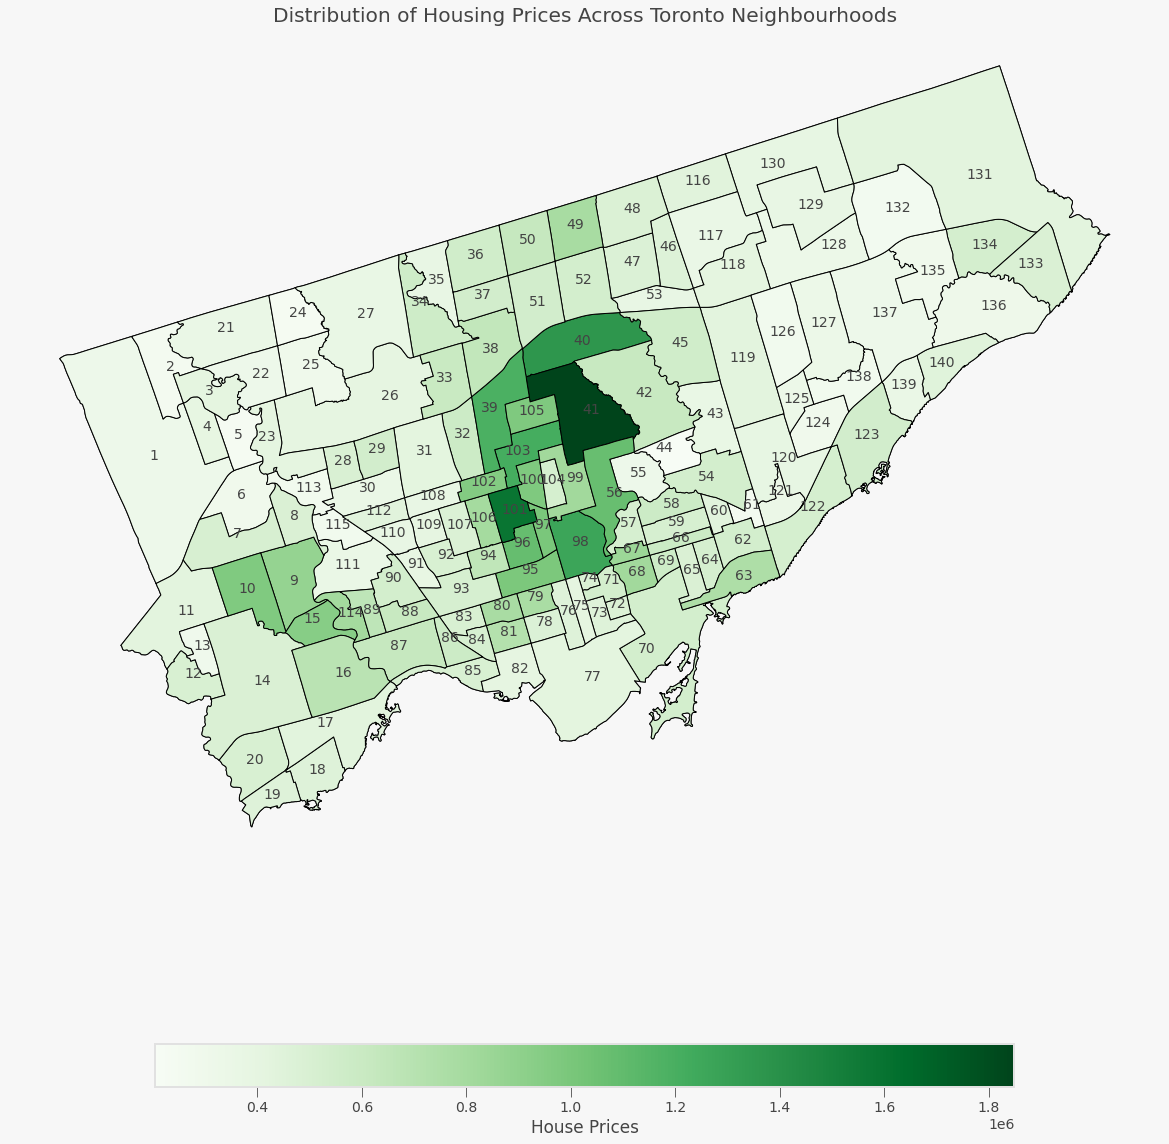

In [133]:
fig, gax = plt.subplots(figsize=(22,22))
data.plot(ax=gax, edgecolor='black', color='white')
data.plot(ax=gax, edgecolor='black', column = 'Home Prices', legend=True,  
          legend_kwds={'shrink': 0.7, 'label':'House Prices', 'orientation': "horizontal"}, cmap='Greens')
plt.axis('off')  
gax.set_title('Distribution of Housing Prices Across Toronto Neighbourhoods')
data['coords'] = data['geometry'].apply(lambda x: x.representative_point().coords[:])
data['coords'] = [coords[0] for coords in data['coords']]
for idx,row in data.iterrows():
    plt.annotate(s=row['HoodID'], xy=row['coords'],
                horizontalalignment='center')
plt.show()

## Population Distribution

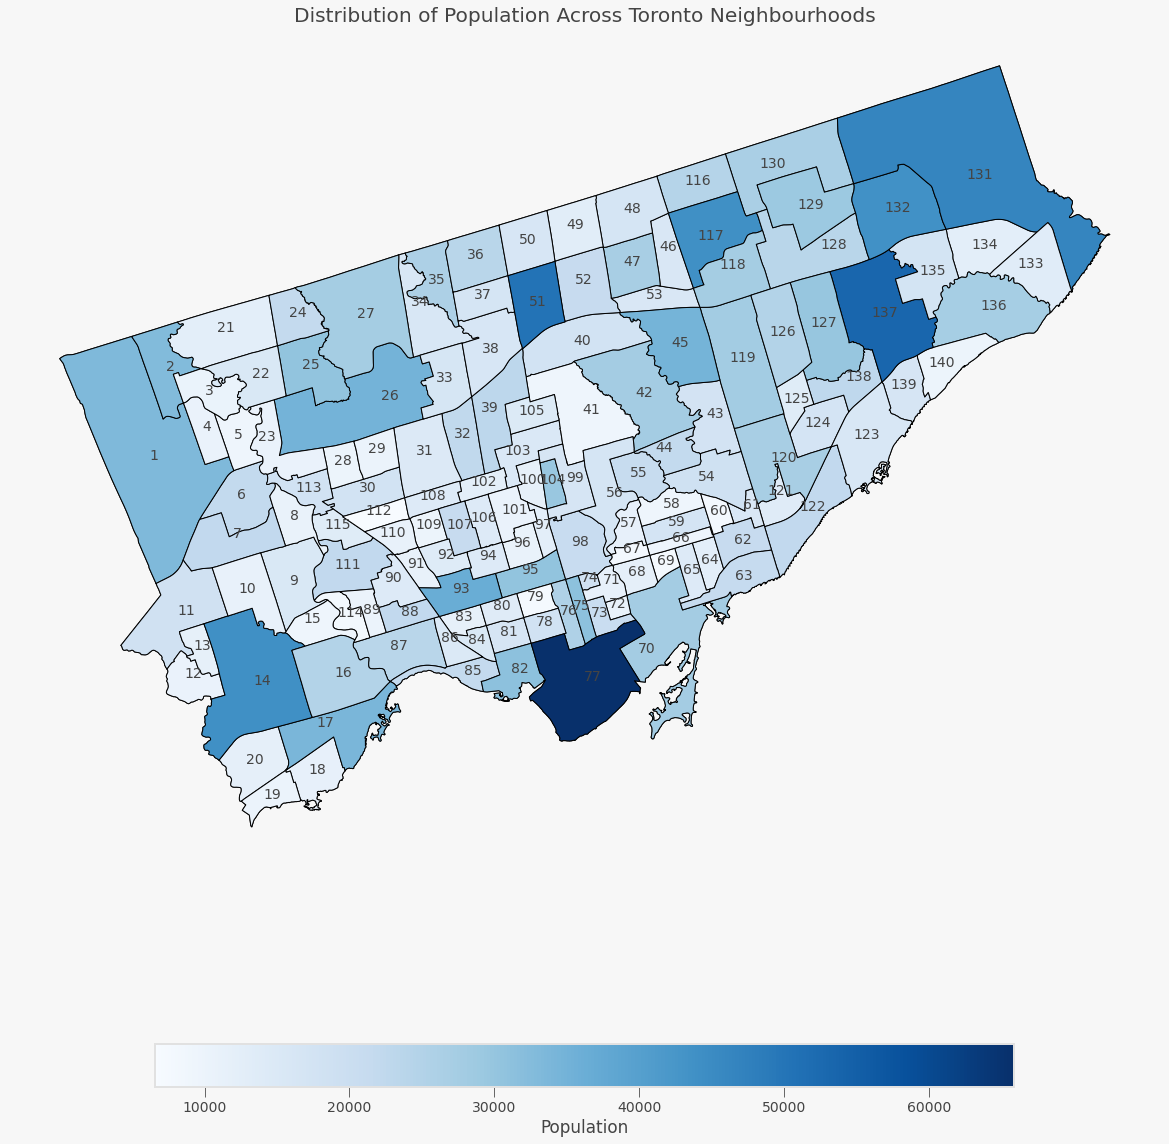

In [134]:
fig, gax = plt.subplots(figsize=(22,22))
data.plot(ax=gax, edgecolor='black', color='white')
data.plot(ax=gax, edgecolor='black', column = 'Population', legend=True,  
          legend_kwds={'shrink': 0.7, 'label':'Population', 'orientation': "horizontal"}, cmap='Blues')
plt.axis('off')  
gax.set_title('Distribution of Population Across Toronto Neighbourhoods')
data['coords'] = data['geometry'].apply(lambda x: x.representative_point().coords[:])
data['coords'] = [coords[0] for coords in data['coords']]
for idx,row in data.iterrows():
    plt.annotate(s=row['HoodID'], xy=row['coords'],
                horizontalalignment='center')
plt.show()

## Neighbourhood Employment

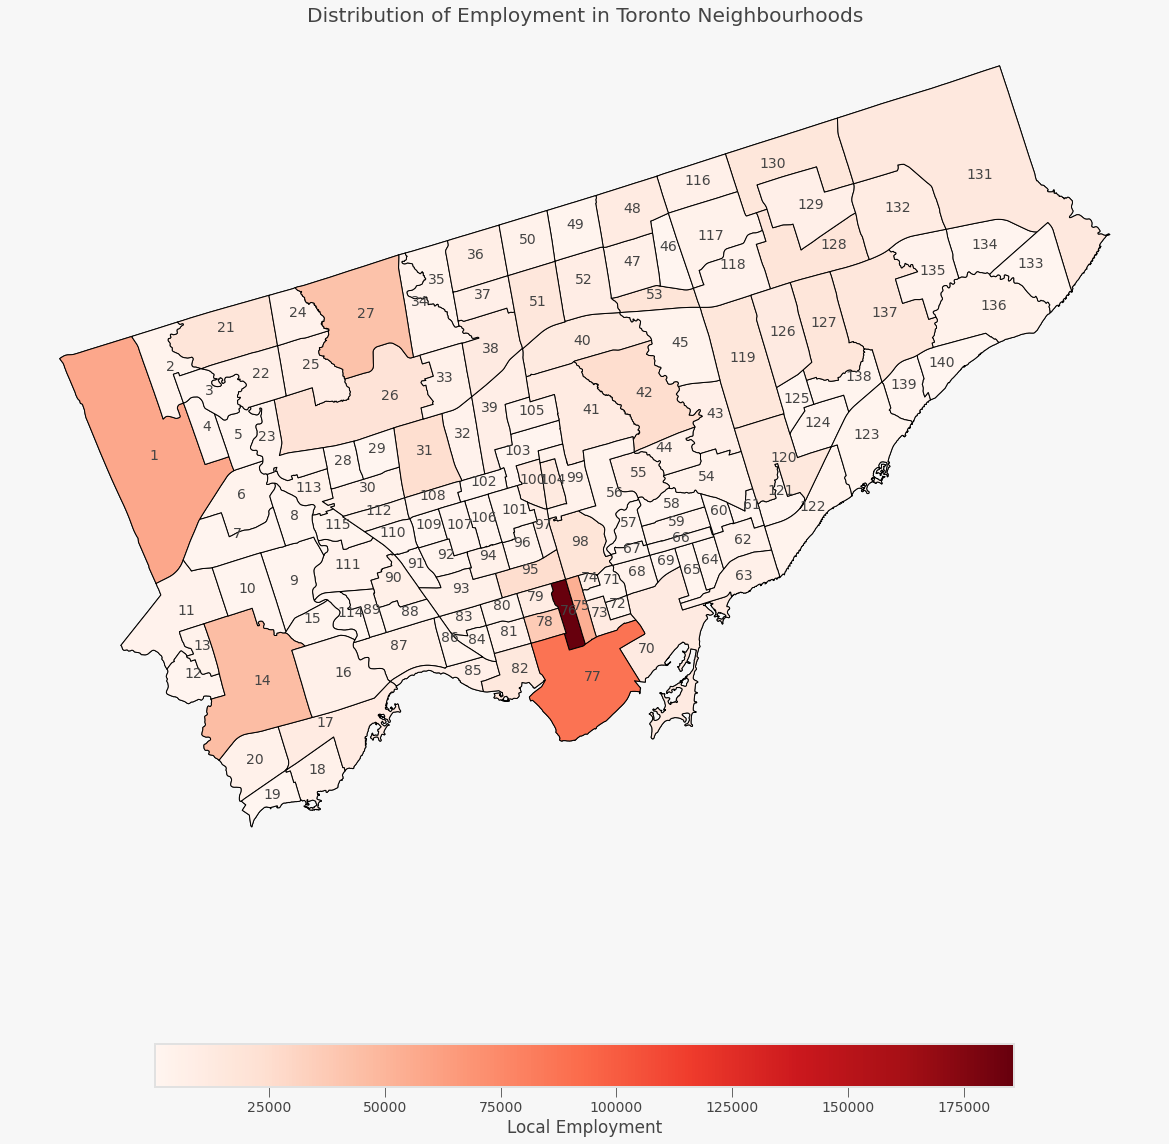

In [135]:
fig, gax = plt.subplots(figsize=(22,22))
data.plot(ax=gax, edgecolor='black', color='white')
data.plot(ax=gax, edgecolor='black', column = 'Local Employment', legend=True,  
          legend_kwds={'shrink': 0.7, 'label':'Local Employment', 'orientation': "horizontal"}, cmap='Reds')
plt.axis('off')  
gax.set_title('Distribution of Employment in Toronto Neighbourhoods')
data['coords'] = data['geometry'].apply(lambda x: x.representative_point().coords[:])
data['coords'] = [coords[0] for coords in data['coords']]
for idx,row in data.iterrows():
    plt.annotate(s=row['HoodID'], xy=row['coords'],
                horizontalalignment='center')
plt.show()

# Analyzing the Economic Opportunities in Toronto

We observed that most businesses can be seen in the Bay Street Corridor, along with most employment opportunities. This would mean that the best place for a young professional to be is around the Bay Street Corridor, where they are more likely to find employment opportunities. While living in the Bay Street corridor may be more expensive for young professionals due to higher house prices, there are many surrounding neighbourhoods with cheaper housing options which would be suitable for a young professional. 

Employment in Toronto was on an upspring prior to the pandemic which brought employment levels down. However, with vaccination rates rising, Toronto should be able to expect to see a rise in upswing again. 